![alt text](images/HDAT9500Banner.PNG)
<br>

# Chapter 7 - Exercise 1: PCA

# 1. Introduction

## 1.1. Aims:
1. Perform PCA using Scikit-Learn and singular value decomposition
2. Select an appropriate number of principal components by computing the proportion of variance explained
3. Understand what biplots represent
 
## 1.2. Jupyter Notebook Intructions
1. Read the content of each cell.
2. Where necessary, follow the instructions that are written in each cell.
3. Run/Execute all the cells that contain Python code sequentially (one at a time), using the "Run" button.
4. For those cells in which you are asked to write some code, please write the Python code first and then execute/run the cell.

# 2. Dataset: Breast Cancer Wisconsin (Diagnostic) Data Set

## 2.1. Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 
This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/ and the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

## 2.2. Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)
3. to 32. Ten real-valued features are computed for each cell nucleus:

a. radius (mean of distances from center to points on the perimeter)
b. texture (standard deviation of gray-scale values)
c. perimeter
d. area
e. smoothness (local variation in radius lengths)
f. compactness (perimeter^2 / area - 1.0)
g. concavity (severity of concave portions of the contour)
h. concave points (number of concave portions of the contour)
i. symmetry
j. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

Further information can be found on:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

## 2.3. Import dataset

In [1]:
import numpy as np
import pandas as pd

Import the dataset and print it. Have a look at the dataset.

In [2]:
bcw = pd.read_csv('./data/breast-cancer-wisconsin-data/data.csv', sep=',')
print(bcw)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
1      842517         M       20.570         17.77          132.90     1326.0   
2    84300903         M       19.690         21.25          130.00     1203.0   
3    84348301         M       11.420         20.38           77.58      386.1   
4    84358402         M       20.290         14.34          135.10     1297.0   
5      843786         M       12.450         15.70           82.57      477.1   
6      844359         M       18.250         19.98          119.60     1040.0   
7    84458202         M       13.710         20.83           90.20      577.9   
8      844981         M       13.000         21.82           87.50      519.8   
9    84501001         M       12.460         24.04           83.97      475.9   
10     845636         M       16.020         23.24          102.70      797.8   
11   84610002         M     

In [3]:
bcw.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


## 3. Principal Component Analysis

## 3.1. PCA Using Scikit-Learn

In [4]:
from sklearn.decomposition import PCA

In [5]:
from sklearn import preprocessing

Select the first 10 numerical features in the dataset; these will be our feature vectors.

In [6]:
print(bcw.columns)
X = bcw[bcw.columns[2:12]]
X.describe()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


Scale data to have zero mean and unit variance.

In [7]:
X_scaled = preprocessing.scale(X)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[-1.37363271e-16  6.86816353e-17 -1.24875700e-16 -2.18532476e-16
  1.74825981e-16  1.99801121e-16  3.74627101e-17 -3.74627101e-17
  1.87313551e-16  4.52674414e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


PCA, keep first two principal components 

In [8]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X_scaled)
print(X2D)

[[ 5.22415459  3.20442816]
 [ 1.72809379 -2.54083911]
 [ 3.96975705 -0.55007488]
 ...
 [ 0.64958328 -2.0417835 ]
 [ 6.90566407  1.21624274]
 [-3.97083348 -0.98997117]]


Look at the loadings of the first two principal components.

In [9]:
print(pca.components_)

[[ 0.36393793  0.15445113  0.37604434  0.36408585  0.23248053  0.36444206
   0.39574849  0.4180384   0.21523797  0.07183744]
 [-0.31392907 -0.14718091 -0.28465789 -0.30484171  0.40196232  0.26601315
   0.10428597  0.0071836   0.36830091  0.5717677 ]]


## 3.2. Biplot 

In [10]:
import matplotlib.pyplot as plt

# Class labels
y = bcw.loc[:, 'diagnosis']

# Define biplot
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    fig, ax = plt.subplots(figsize=(8,8))
    for g in np.unique(y):
        ix = np.where(y == g)
        ax.scatter(xs[ix] * scalex, ys[ix] * scaley, label = g)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.legend(loc='best')
    plt.grid()

# Call the function. Use only the 2 principal components.
biplot(X2D, pca.components_.T, X.columns)
plt.show()

All the loadings of the first principal component are positive while for the second principal component some loadings are positive and some are negative.

## 3.3. Proportion of Variance Explained

Determine the proportion of variance explained by each of the first two principal components.

In [11]:
pve = pca.explained_variance_ratio_
print(pve)

[0.5478588  0.25187136]


The first dimension explains 54.8% of the variance, while the second explains 25.2%.
How much variance do both principal components explain?

In [12]:
print(sum(pve))

0.7997301577126192


How many principal components do we need to explain 95% of the data variance?

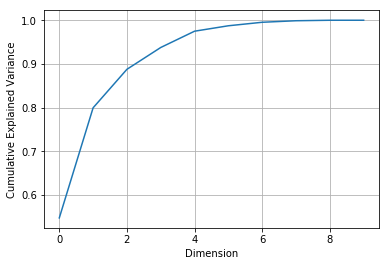

Minimum number of dimensions that explain 95% of the data variance:
5


In [13]:
# Compute PCA without reducing dimensionality
pca = PCA()
pca.fit(X_scaled)

# Plot the cumulative sum of explained variance
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_sum)
plt.xlabel('Dimension')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Compute the minimum number of dimensions d that explain 95% of the data variance
d = np.argmax(cumulative_sum >= 0.95)+1
print("Minimum number of dimensions that explain 95% of the data variance:")
print(d)

We could now re-run pca with n_components=d. However, you can also set n_components to be a float between 0.0 and 1.0 indicating the proportion of variance you wish to preserve.

In [14]:
pca = PCA(n_components=0.95)
XDD = pca.fit_transform(X_scaled)
print(XDD)

[[ 5.22415459  3.20442816 -2.17133953 -0.16927588  1.51425196]
 [ 1.72809379 -2.54083911 -1.01967851  0.54753945  0.3123297 ]
 [ 3.96975705 -0.55007488 -0.32356876  0.39796415 -0.32287706]
 ...
 [ 0.64958328 -2.0417835   1.7109662  -0.27155927 -0.10197133]
 [ 6.90566407  1.21624274  1.64012034  0.15347236  0.40596648]
 [-3.97083348 -0.98997117  2.1582767   0.20564287  1.59571973]]


## 3.4. Exercise: PCA Using SVD

In [15]:
# Make a working copy of X called K. This way we can compare current to previous results.
K = X
# Scale data to have zero mean and unit variance, using the methods .mean() and .std()
# Column-wise mean of K
K_mean = ... ### STUDENT TO-DO ###
# Column-wise standard deviation of K
K_std = ... ### STUDENT TO-DO ###
# Scaled K. Use the computed K_mean and K_std
K_scaled = ... ### STUDENT TO-DO ###
print(K_scaled.mean(axis=0))
print(K_scaled.std(axis=0))

AttributeError: 'ellipsis' object has no attribute 'mean'

In [ ]:
# Perform a singular value decomposition of K_scaled using the function np.linalg.svd()
U, s, Vt = ... ### STUDENT TO-DO ###
# Extract the first two principal component loading vectors. How do they compare to previous results? 
# Does the difference matter?
c1 = Vt.T[:, 0]
print(c1)
c2 = Vt.T[:, 1]
print(c2)

In [ ]:
# Compute the scores of the first two principal components (hint: use the .dot() method)
k1 = ... ### STUDENT TO-DO ###
k2 = ... ### STUDENT TO-DO ###
# Compare results
print("First two PC scores computed by SVD:")
print(np.column_stack([k1,k2]))
print("First two PC scores computed by Scikit-Learn:")
print(X2D)

In [ ]:
# Compute the proportion of variance explained by the first two principal components
# Start by computing the total variance in the data (use K_scaled and the .var() method on its columns, sum up the result)
K_var_total = ... ### STUDENT TO-DO ###
print(K_var_total)

In [ ]:
# Compute the variance of the scores of the first two principal components
k1_var = ... ### STUDENT TO-DO ###
k2_var = ... ### STUDENT TO-DO ###
# Compute the proportion of variance explained by the first two principal components
pve1 = ... ### STUDENT TO-DO ###
pve2 = ... ### STUDENT TO-DO ###
# Compare results
print("Proportion of variance explained, computed by SVD:")
print([pve1, pve2])
print("Proportion of variance explained, computed by Scikit-Learn:")
print(pve)

In [ ]:
# Alternatively, the variance of the scores of the first two principal components can be computed by 
# squaring the singular values and diving by the number of observations
h = ... ### STUDENT TO-DO ###
k1_var_B = h[0]
k2_var_B = h[1]
print("Method A")
print([k1_var, k2_var])
print("Method B")
print([k1_var_B, k2_var_B])

Congratulations, you now know how to reduce the dimensionality of any dataset down to any number of dimensions, while preserving as much variance as possible!